In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SolarDelhi.csv', index_col = 0)
df.head()

,PRECTOT,QV2M,RH2M,PS,TS,T2M,T2MWET,T2MDEW,ALLSKY_SFC_LW_DWN,KT,ALLSKY_SFC_SW_DWN
0,0.02,0.004819,45.36,98.82,13.57,14.78,2.76,2.72,7.72,0.40,2.34
1,0.03,0.004835,45.54,99.19,13.71,14.83,2.89,2.85,8.08,0.35,2.06
2,0.01,0.004429,41.00,99.06,13.46,15.08,1.63,1.57,7.72,0.40,2.34
3,0.01,0.004591,42.18,99.15,13.91,15.21,2.16,2.12,8.08,0.35,2.06
4,6.43,0.006701,64.49,98.91,13.46,14.43,7.74,7.74,8.67,0.25,1.43


In [13]:
df['KT'] = df['KT'].astype(float)
df[df == -999] = np.nan
(df<0).any()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6816 entries, 0 to 6815
Data columns (total 11 columns):
PRECTOT              6816 non-null float64
QV2M                 6816 non-null float64
RH2M                 6816 non-null float64
PS                   6816 non-null float64
TS                   6816 non-null float64
T2M                  6816 non-null float64
T2MWET               6816 non-null float64
T2MDEW               6816 non-null float64
ALLSKY_SFC_LW_DWN    6816 non-null float64
KT                   6816 non-null float64
ALLSKY_SFC_SW_DWN    6816 non-null float64
dtypes: float64(11)
memory usage: 639.0 KB


In [4]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
    
    #sigmoid activation function
    def sigmoid(self,x):
        return (1/(1 + np.exp(-x)))
        
    #derivate of sigmoid activation function
    def sigmoid_prime(self,x):
        return x * (1 - x) #Equivalent to output * (1 - output)
        
    def train(self, features, targets):
            ''' Train the network on batch of features and targets. 
            Arguments
            ---------  
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values 
            '''
            n_records = features.shape[0]
            delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
            delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
            for X, y in zip(features, targets):
                final_outputs, hidden_outputs = self.forward_pass_train(X)  # Implement the forward pass function below
                # Implement the backproagation function below
                delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                                delta_weights_i_h, delta_weights_h_o)
                self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)
        
    def forward_pass_train(self, X):
        ''' Implement forward pass here 
        Arguments
        ---------
        X: features batch
        '''
        #### Implement the forward pass here ####
        ### Forward pass ###
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.sigmoid(hidden_inputs) # signals from hidden layer

        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = self.sigmoid(final_inputs) # signals from final output layer

        return final_outputs, hidden_outputs
        
    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement backpropagation
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
        '''
        #### Implement the backward pass here ####
        ### Backward pass ###
        error = y - final_outputs # Output layer error is the difference between desired target and actual output.
        output_error_term = error * self.sigmoid_prime(final_outputs)

        hidden_error = np.dot(self.weights_hidden_to_output,error)
        hidden_error_term = hidden_error * self.sigmoid_prime(hidden_outputs)

        # Weight step (input to hidden)
        delta_weights_i_h += hidden_error_term * X[:, None]
        # Weight step (hidden to output)
        delta_weights_h_o += output_error_term * hidden_outputs[:,None]
        return delta_weights_i_h, delta_weights_h_o    

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records
        '''
        self.weights_hidden_to_output += self.lr * delta_weights_h_o/n_records #update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * delta_weights_i_h/n_records # update input-to-hidden weights with gradient descent stepdef update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        
    def run(self, features):
        ''' Run a forward pass through the network with input features 
            Arguments
            ---------
            features: 1D array of feature values
        '''
        #### Implement the forward pass here ####
        hidden_inputs = np.dot(features, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        final_outputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer

        # signals from final output layer 
        return final_outputs

In [5]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [12]:
from sklearn.model_selection import train_test_split

x = df[df.columns[:10]]
y = df['ALLSKY_SFC_SW_DWN']
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.8, random_state =  90)

print(x_train)

      PRECTOT      QV2M   RH2M     PS     TS    T2M  T2MWET  T2MDEW  \
2516     0.86  0.015326  53.36  97.67  31.49  30.90   20.26   20.26   
6410     0.00  0.009473  28.25  97.78  35.61  33.73   12.70   12.78   
4993     4.61  0.012037  33.22  97.70  37.98  35.08   16.12   16.46   
3383     0.00  0.005784  19.48  97.96  33.13  31.64    5.42    5.40   
5189    24.13  0.021562  77.20  97.30  30.78  30.28   25.84   25.94   
...       ...       ...    ...    ...    ...    ...     ...     ...   
2727     0.00  0.003831  24.24  98.92  18.97  21.13   -0.11   -0.23   
1347     0.00  0.005148  39.38  99.07  18.09  18.08    4.09    4.06   
5746     0.00  0.005166  46.05  98.85  14.41  15.63    4.05    4.03   
2717     0.00  0.003201  20.51  98.84  18.91  20.91   -2.40   -2.60   
3931     0.00  0.016150  61.52  97.95  29.31  29.37   21.20   21.20   

      ALLSKY_SFC_LW_DWN    KT  
2516              10.12  0.60  
6410              10.42  0.42  
4993              10.66  0.58  
3383               

In [9]:
N_i = x_train.shape[1]
iterations = 40
learning_rate = 0.40
hidden_nodes = 6
output_nodes = 1
batch_size = 500

In [10]:
import sys
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)
losses = {'train':[], 'validation':[]}
for i in range(iterations):
    # Go through a random batch of 150 records from the training data set
    for j in range(x_train.shape[0] - batch_size):
        x = x_train[j:batch_size]
        y = y_train[j:batch_size]
        j = j + batch_size
        network.train(x,y)
        
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

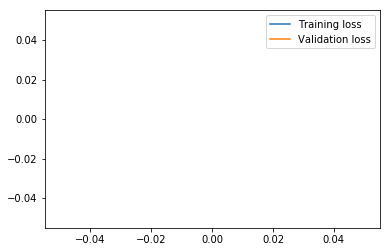

In [11]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()